**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2023**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 3

**Datos de la entrega:** Lunes 20 de noviembre 2023, a más tardar a las 11:59 pm

**Estudiantes:**
- Valeria Prado Rodríguez
- Jean Paul Rodríguez Flores


# Experimentación con regresión en redes neuronales artificiales

Indicaciones generales que deben seguir:
1. Se le proporciona el conjunto de datos y un archivo de texto con una breve explicación de las columnas (esta es la versión del dataset que debe usar, no busque similares en internet).
1. Realizarán regresión y el atributo a predecir es: **price**.
1. Ustedes deben ir tomando las decisiones en el proceso y documentarlas en celdas de texto y además su código debe venir ampliamente comentado. Recuerden que el profesor hace de cliente por si tienen dudas.
1. Deben dividir el dataset en tres conjuntos de datos: train (60%), validation (20%) y test (20%).
1. Ustedes proponen el diseño experimental (quiero ver qué han entendido de este concepto fundamental en data science).
1. Deben utilizar **una de estas dos herramientas** para dar seguimiento a los resultados en el caso de la red neuronal artificial:
    1. https://www.wandb.com/
    1. https://www.comet.ml/site/


Criterios de evaluación:
1. Deben presentar una implementación completa, en una de estas opciones: pytorch, tensorflow o keras (Claro que pueden usar numpy, pandas y otras bibliotecas más, para todo el tema de carga del dataset, analizarlo y pre-procesarlo). (**55 puntos**)
1. Uso de herramienta de seguimiento de resultados. (**10 puntos**)
1. Documentación de decisiones en celdas de texto y comentarios al código. (**20 puntos**)
1. Conclusiones finales: En una celda de texto al final del cuaderno, incluya sus conclusiones más importantes del experimento y algunos de los gráficos que genera la herramienta seleccionada, junto con su interpretación de los mismos. (**15 puntos**)

   carat  depth  table  price     x     y     z  cut
0   0.23   61.5   55.0    326  3.95  3.98  2.43    4
1   0.21   59.8   61.0    326  3.89  3.84  2.31    3
2   0.23   56.9   65.0    327  4.05  4.07  2.31    1
3   0.29   62.4   58.0    334  4.20  4.23  2.63    3
4   0.31   63.3   58.0    335  4.34  4.35  2.75    1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
 7   cut     53940 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 3.3 MB
None
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.0

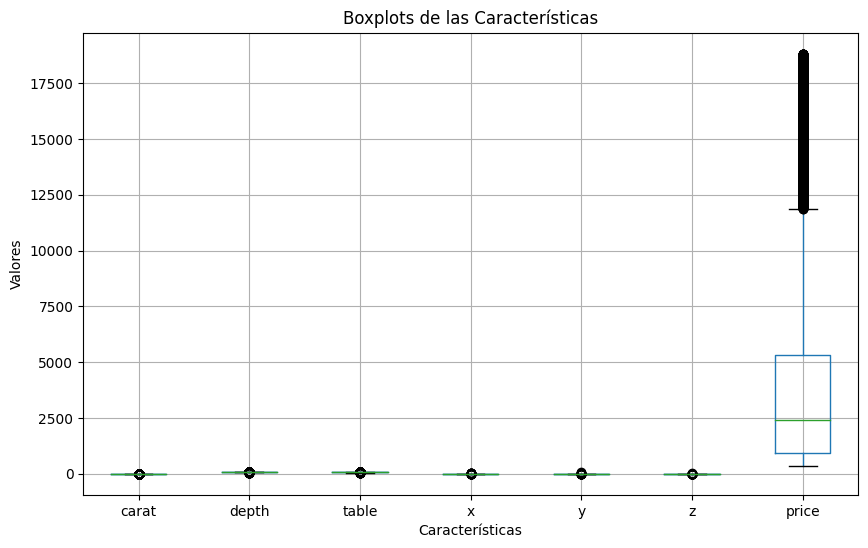

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Asumiendo que el conjunto de datos está en un archivo CSV llamado 'diamonds.csv'
df = pd.read_csv('diamonds.csv')

# Mostrar las primeras filas del DataFrame para verificar la carga
print(df.head())

# Mostrar información general sobre el DataFrame
print(df.info())

# Estadísticas descriptivas para atributos numéricos
print(df.describe())

columnas = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

# Visualizar boxplots para identificar valores atípicos
plt.figure(figsize=(10, 6))
df[columnas].boxplot()
plt.title('Boxplots de las Características')
plt.ylabel('Valores')
plt.xlabel('Características')
plt.show()

Preprocesamiento y division:

In [6]:
# Tratar valores nulos si los hay
df.dropna(inplace=True)

# Codificar variables categóricas como números (por ejemplo, usando one-hot encoding para 'cut' y 'color')
df = pd.get_dummies(df, columns=['cut'], drop_first=True)

# Tratar lo valores atipicos
df[columnas] = df[columnas].apply(lambda x: np.log1p(x))


# Normalizar características ('carat', 'x', 'y', 'z', 'depth', 'table')
scaler = MinMaxScaler()
features_to_normalize = ['carat', 'x', 'y', 'z', 'depth', 'table']
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

X = df.drop('price', axis=1)
y = df['price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)